# Applied Machine Learning, Week 1 Exercises.
## Cross-validation

This notebook creates some simple example data to show how we run cross-validation to find an optimal value for $K$.

### Import libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import matplotlib.pyplot as plt

### Setting up the data
Make a DataFrame with two predictor variables, $x_1$ and $x_2$. Also include a reponse variable, $y$.

In [ ]:
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

### Run K-fold cross-validation
First fit a linear regression model to the data. Then use [Leave-one-out cross-validation](https://www.statology.org/leave-one-out-cross-validation/) (LOOCV) to evaluate the model performance.

In [ ]:
# define the predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

# define a range of K values for the cross validation
n_splits = range(2,11)

def run_cross_validation(n_split, X, y):
    """
    Given a set of training data and a set of test 
    """

    # define the cross-validation method
    cv = KFold(n_splits=n_split, random_state=1, shuffle=True)

    # make the linear regression model
    model = LinearRegression()

    # evaluate the model with k-fold cross validation
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

    # return root mean square error
    return sqrt(mean(absolute(scores)))

Run the cross-validation on $k = [2,10]$. Collect the mean error for each run and plot them.

In [ ]:
errors = []
for n_split in n_splits:
    errors.append(run_cross_validation(n_split, X, y))


### Plot the error for each run of the K-fold cross-validation

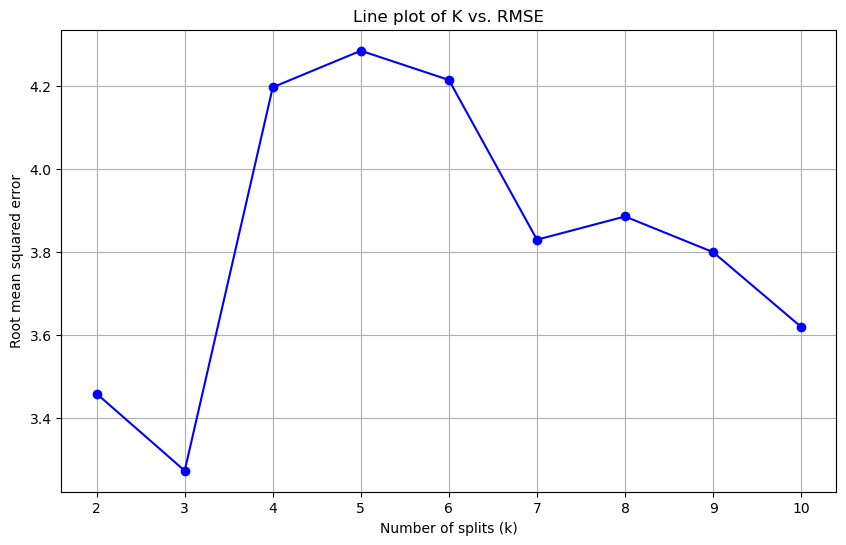

In [ ]:
# make the plot
plt.figure(figsize=(10,6))
plt.plot(n_splits, errors, marker='o', linestyle='-', color='b')

# labels
plt.xlabel('Number of splits (k)')
plt.ylabel('Root mean squared error')

# title
plt.title("Line plot of K vs. RMSE")

# plot it
plt.grid(True)
plt.show()

In [ ]:
print(errors)


[3.458671469053947, 3.2732142222796363, 4.196437946506055, 4.284373111711817, 4.213997186232847, 3.8294219311503706, 3.885328066750872, 3.7994373286639087, 3.619456476385566]
